# Planar data classification with one hidden layer

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
%matplotlib inline
%load_ext autoreload
%autoreload 2

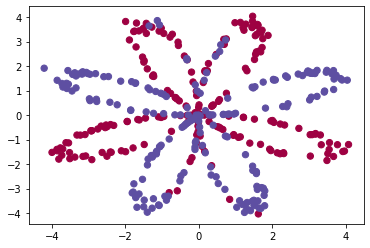

In [2]:
# load the dataset
X, Y = load_planar_dataset()
# visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)

In [3]:
# simple logistic regression
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.T)

C:\Users\Bekhnam\anaconda3\envs\py3env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegressionCV()

In [4]:
clf.fit??

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


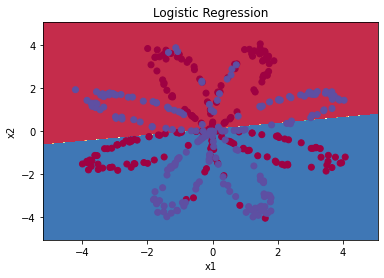

In [5]:
# plot the dexision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")
# print accuracy
LR_predictions = clf.predict(X.T)
print('Accuracy of logistic regression: %d ' % float((np.dot(Y, LR_predictions) + np.dot(1 - Y, 1 - LR_predictions)) / float(Y.size) * 100) + 
     '% ' + "(percentage of correctly labelled datapoints)")

# Neural Network Model

In [6]:
# define the neural network structure
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    return (n_x, n_h, n_y)

In [7]:
# initialize the model's parameters
def initialize_parameters(n_x, n_h, n_y):
    """
    Arguments:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
            W1 -- weight matrix of shape (n_h, n_x)
            b1 -- bias vector of shape (n_h, 1)
            W2 -- weight matrix of shape (n_y, n_h)
            b2 -- bias vector of shape (n_y, 1)
    """
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {"W1": W1,
                 "b1": b1,
                 "W2": W2,
                 "b2": b2}
    return parameters

In [8]:
# forward propagation function
def forward_propagation(X, parameters):
    """
    Arguments:
    X -- input data of size(n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- the sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    #forward propagation
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
            "A1": A1,
            "Z2": Z2,
            "A2": A2}
    return A2, cache

In [9]:
# compute the cost
def compute_cost(A2, Y):
    """
    Computes the cross-entropy cost
    
    Arguments:
    A2 -- the sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    cost -- cross-entropy cost
    """
    # number of examples
    m = X.shape[1]
    logprobs = np.multiply(Y, np.log(A2)) + (1 - Y) * np.log(1 - A2)
    cost = (-1 / m) * np.sum(logprobs)
    
    cost = float(np.squeeze(cost))
    
    return cost

In [10]:
# implement backward propagation
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation
    
    Arguments:
    parameters -- python dictionary containing our parameters
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    # number of examples
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]
    # backward propagation
    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
            "db1": db1,
            "dW2": dW2,
            "db2": db2}
    
    return grads

In [11]:
# update parameters
def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule
    
    Arguments:
    parameters -- python dictionary containing your parameters
    grads -- python dictionary containing your gradients
    
    Returns:
    parameters -- python dictionary containing your updated parameters
    """
    # copy parameters
    W1 = copy.deepcopy(parameters["W1"])
    b1 = copy.deepcopy(parameters["b1"])
    W2 = copy.deepcopy(parameters["W2"])
    b2 = copy.deepcopy(parameters["b2"])
    # retrieve gradients
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    # update rule
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                 "b1": b1,
                 "W2": W2,
                 "b2": b2}
    
    return parameters

In [12]:
# neural network model
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost = False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    # initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    # loop gradient descent
    for i in range(0, num_iterations):
        # forward propagation
        A2, cache = forward_propagation(X, parameters)
        # cost
        cost = compute_cost(A2, Y)
        # backward propagation
        grads = backward_propagation(parameters, cache, X, Y)
        # update parameters
        parameters = update_parameters(parameters, grads)
        
        if (print_cost) and i % 1000 == 0:
            print('Cost after iteration %i: %f' %(i, cost))
    
    return parameters

In [13]:
# test the model
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters
    X -- input data of size (n_x, m)
    
    Returns:
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    # computes probabilities using forward propagation and classifies to 0/1 using 0.5 as thr threshold.
    A2, cache = forward_propagation(X, parameters)
    predictions = A2 > 0.5
    
    return predictions

Cost after iteration 0: 0.693113
Cost after iteration 1000: 0.282578
Cost after iteration 2000: 0.269777
Cost after iteration 3000: 0.262318
Cost after iteration 4000: 0.241228
Cost after iteration 5000: 0.226023
Cost after iteration 6000: 0.221621
Cost after iteration 7000: 0.218907
Cost after iteration 8000: 0.216885
Cost after iteration 9000: 0.215260


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

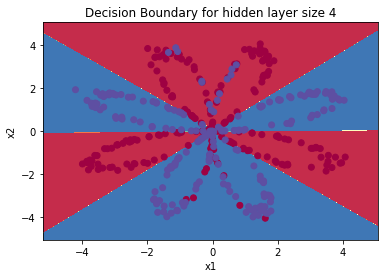

In [14]:
# test the model on the planar dataset
parameters= nn_model(X, Y, n_h=4, num_iterations=10000, print_cost=True)
# plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [15]:
# print accuracy
predictions = predict(parameters, X)
print('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + "%")

Accuracy: 90%


Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 90.5 %
Accuracy for 20 hidden units: 91.25 %
Accuracy for 50 hidden units: 91.0 %


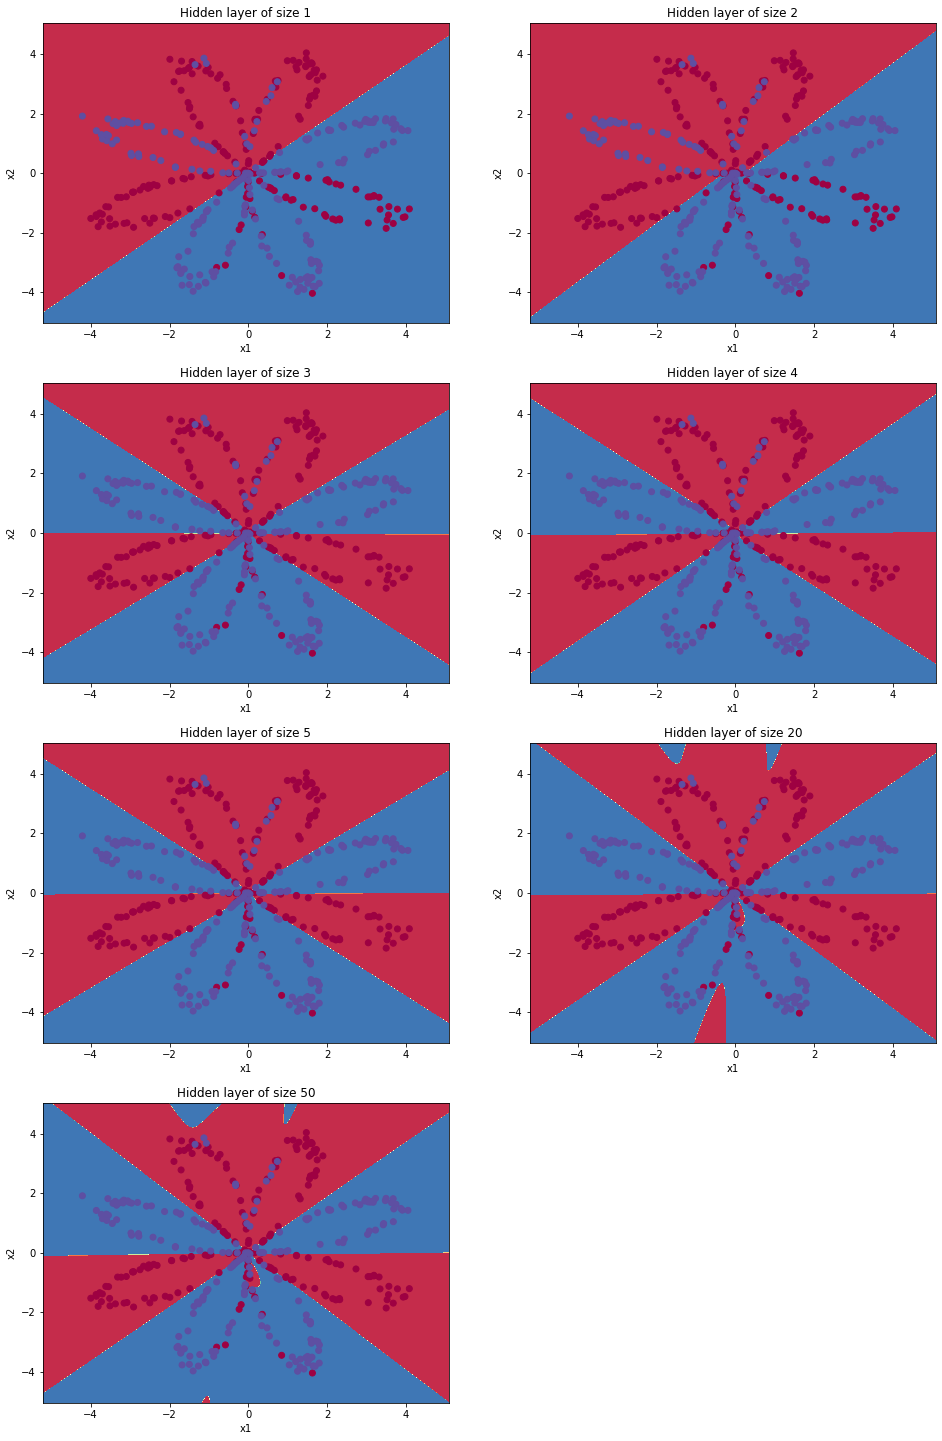

In [16]:
# tuning hidden layer size
plt.figure(figsize = (16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i + 1)
    plt.title('Hidden layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations=5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100)
    print("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

# Performance on other datasets

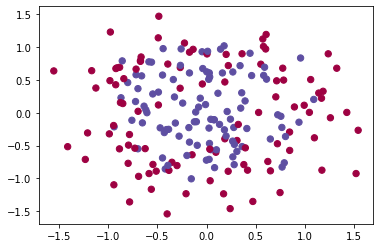

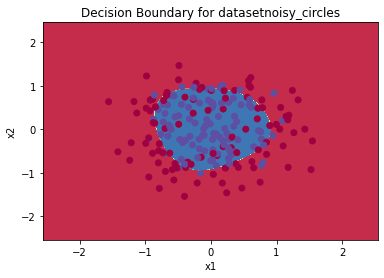

Accuracy for noisy_circles dataset: 76.0 %


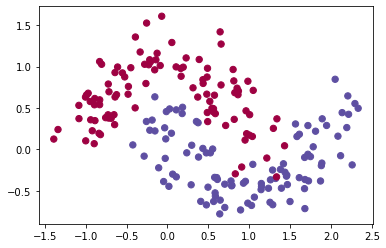

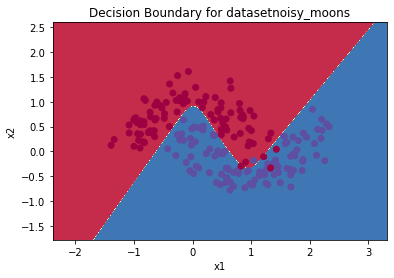

Accuracy for noisy_moons dataset: 97.5 %


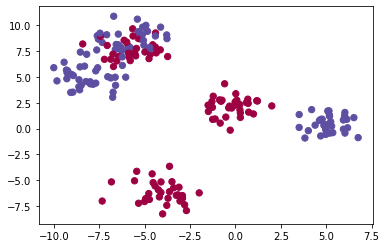

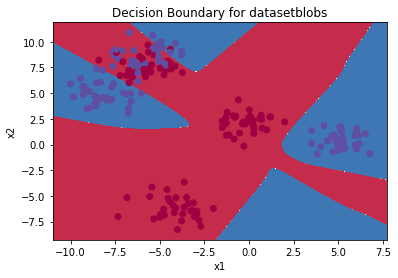

Accuracy for blobs dataset: 87.0 %


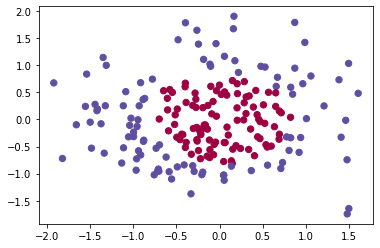

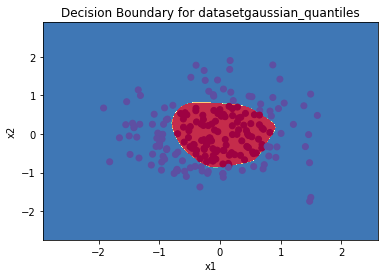

Accuracy for gaussian_quantiles dataset: 100.0 %


In [23]:
# datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {
    "noisy_circles": noisy_circles,
    "noisy_moons": noisy_moons,
    "blobs": blobs,
    "gaussian_quantiles": gaussian_quantiles
}
for dataset in ["noisy_circles", "noisy_moons", "blobs", "gaussian_quantiles"]:
    X, Y = datasets[dataset]
    X, Y = X.T, Y.reshape(1, Y.shape[0])
    # make blobs binary
    if dataset == 'blobs':
        Y = Y%2
    # visualize the data
    plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)
    plt.show()
    # build a model with a n_h-dimensional hidden layer
    parameters = nn_model(X, Y, n_h=20, num_iterations=5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    plt.title("Decision Boundary for dataset" + dataset)
    plt.show()
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) *100)
    print("Accuracy for {} dataset: {} %".format(dataset, accuracy))